In [26]:
# Importing pandas library
import pandas as pd

# Use the upload() function to upload files
from google.colab import files
uploaded = files.upload()

# Loop through the uploaded files
for file_name in uploaded.keys():
    # Load the CSV file into a DataFrame with specified encoding
    df = pd.read_csv(file_name, encoding='latin-1')
    # Display the first few rows of the DataFrame
    print(df.head())

Saving youtubers_df.csv to youtubers_df (1).csv
   Rank       Username            Categories   Suscribers         Country  \
0     1        tseries       MÃºsica y baile  249500000.0           India   
1     2        MrBeast    Videojuegos, Humor  183500000.0  Estados Unidos   
2     3      CoComelon            EducaciÃ³n  165500000.0         Unknown   
3     4       SETIndia                   NaN  162600000.0           India   
4     5  KidsDianaShow  AnimaciÃ³n, Juguetes  113500000.0         Unknown   

        Visits      Likes  Comments  \
0      86200.0     2700.0      78.0   
1  117400000.0  5300000.0   18500.0   
2    7000000.0    24700.0       0.0   
3      15600.0      166.0       9.0   
4    3900000.0    12400.0       0.0   

                                               Links  
0  http://youtube.com/channel/UCq-Fj5jknLsUf-MWSy...  
1  http://youtube.com/channel/UCX6OQ3DkcsbYNE6H8u...  
2  http://youtube.com/channel/UCbCmjCuTUZos6Inko4...  
3  http://youtube.com/channel/UCpE

In [25]:
#Removing outliers using z-score method
z_scores = np.abs(zscore(df.select_dtypes(include=np.number)))
threshold = 3
df_no_outliers = df[(z_scores < threshold).all(axis=1)]

# Display information about the dataset after removing outliers
print("Dataset info after removing outliers:")
print(df_no_outliers.info())

Dataset info after removing outliers:
<class 'pandas.core.frame.DataFrame'>
Index: 675 entries, 14 to 999
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rank        675 non-null    int64  
 1   Username    675 non-null    object 
 2   Categories  675 non-null    object 
 3   Suscribers  675 non-null    float64
 4   Country     675 non-null    object 
 5   Visits      675 non-null    float64
 6   Likes       675 non-null    float64
 7   Comments    675 non-null    float64
 8   Links       675 non-null    object 
dtypes: float64(4), int64(1), object(4)
memory usage: 52.7+ KB
None


In [10]:
# Save the dataset after cleaning
cleaned_file_name = "cleaned_youtubers_data.csv"
df_no_outliers.to_csv(cleaned_file_name, index=False)
print("Cleaned dataset saved successfully.")

Cleaned dataset saved successfully.


In [66]:
# Load the cleaned dataset
df_cleaned = pd.read_csv("cleaned_youtubers_data.csv")

# Convert columns to appropriate data types
df_cleaned['Rank'] = df_cleaned['Rank'].astype(int)
df_cleaned['Suscribers'] = df_cleaned['Suscribers'].astype(int)
df_cleaned['Visits'] = df_cleaned['Visits'].astype(int)
df_cleaned['Likes'] = df_cleaned['Likes'].astype(int)
df_cleaned['Comments'] = df_cleaned['Comments'].astype(int)

# Standardize categorical values
df_cleaned['Username'] = df_cleaned['Username'].str.capitalize()
df_cleaned['Categories'] = df_cleaned['Categories'].str.capitalize()
df_cleaned['Country'] = df_cleaned['Country'].str.capitalize()

# Handle missing values if any
df_cleaned.dropna(inplace=True)

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)

# Display the formatted dataset information
print("Formatted dataset info:")
print(df_cleaned.info())

# Save the formatted dataset to a new CSV file
df_cleaned.to_csv("formatted_youtubers_data.csv", index=False)
print("Formatted dataset saved successfully.")



Formatted dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        675 non-null    int64 
 1   Username    675 non-null    object
 2   Categories  675 non-null    object
 3   Suscribers  675 non-null    int64 
 4   Country     675 non-null    object
 5   Visits      675 non-null    int64 
 6   Likes       675 non-null    int64 
 7   Comments    675 non-null    int64 
 8   Links       675 non-null    object
dtypes: int64(5), object(4)
memory usage: 47.6+ KB
None
Formatted dataset saved successfully.


In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the cleaned dataset
df_cleaned = pd.read_csv("cleaned_youtubers_data.csv")

# Convert columns to appropriate data types
convert_dict = {'Rank': int, 'Suscribers': int, 'Visits': int, 'Likes': int, 'Comments': int}
df_cleaned = df_cleaned.astype(convert_dict)

# Standardize categorical values
df_cleaned['Username'] = df_cleaned['Username'].str.capitalize()
df_cleaned['Categories'] = df_cleaned['Categories'].str.capitalize()
df_cleaned['Country'] = df_cleaned['Country'].str.capitalize()

# Handle missing values if any
df_cleaned.dropna(inplace=True)

# Reset index
df_cleaned.reset_index(drop=True, inplace=True)

# Display the formatted dataset information
print("Formatted dataset info:")
print(df_cleaned.info())

# Save the formatted dataset to a new CSV file
df_cleaned.to_csv("formatted_youtubers_data.csv", index=False)
print("Formatted dataset saved successfully.")





Formatted dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 675 entries, 0 to 674
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Rank        675 non-null    int64 
 1   Username    675 non-null    object
 2   Categories  675 non-null    object
 3   Suscribers  675 non-null    int64 
 4   Country     675 non-null    object
 5   Visits      675 non-null    int64 
 6   Likes       675 non-null    int64 
 7   Comments    675 non-null    int64 
 8   Links       675 non-null    object
dtypes: int64(5), object(4)
memory usage: 47.6+ KB
None
Formatted dataset saved successfully.


In [73]:
# Load the formatted dataset
df = pd.read_csv("formatted_youtubers_data.csv")

# Check for non-numeric columns
non_numeric_cols = df.select_dtypes(exclude=np.number).columns.tolist()
print("Non-numeric columns:", non_numeric_cols)

# Perform summary statistics only on numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Remove non-numeric columns from summary statistics calculation
summary_stats = df[numeric_cols].describe()

# Calculate mode separately for numeric columns
mode = df[numeric_cols].mode().iloc[0]

# Calculate additional statistics
range_vals = df[numeric_cols].max() - df[numeric_cols].min()  # Range
variance = df[numeric_cols].var()  # Variance
skewness = df[numeric_cols].skew()  # Skewness
kurtosis = df[numeric_cols].kurtosis()  # Kurtosis

# Concatenate additional statistics to the summary statistics DataFrame
additional_stats = pd.DataFrame({
    'range': range_vals,
    'variance': variance,
    'skewness': skewness,
    'kurtosis': kurtosis
})
summary_stats = pd.concat([summary_stats, additional_stats])

# Print summary statistics
print(summary_stats)


Non-numeric columns: ['Username', 'Categories', 'Country', 'Links']
                   Rank    Suscribers        Visits          Likes  \
count        675.000000  6.750000e+02  6.750000e+02     675.000000   
mean         505.114074  2.061333e+07  7.632237e+05   31640.828148   
std          284.255559  1.067067e+07  1.515571e+06   73235.017754   
min           15.000000  1.170000e+07  0.000000e+00       0.000000   
25%          257.500000  1.380000e+07  3.415000e+04     544.000000   
50%          503.000000  1.670000e+07  1.550000e+05    3300.000000   
75%          751.500000  2.345000e+07  7.590500e+05   21850.000000   
max         1000.000000  7.650000e+07  1.220000e+07  582600.000000   
Rank                NaN           NaN           NaN            NaN   
Suscribers          NaN           NaN           NaN            NaN   
Visits              NaN           NaN           NaN            NaN   
Likes               NaN           NaN           NaN            NaN   
Comments            Na

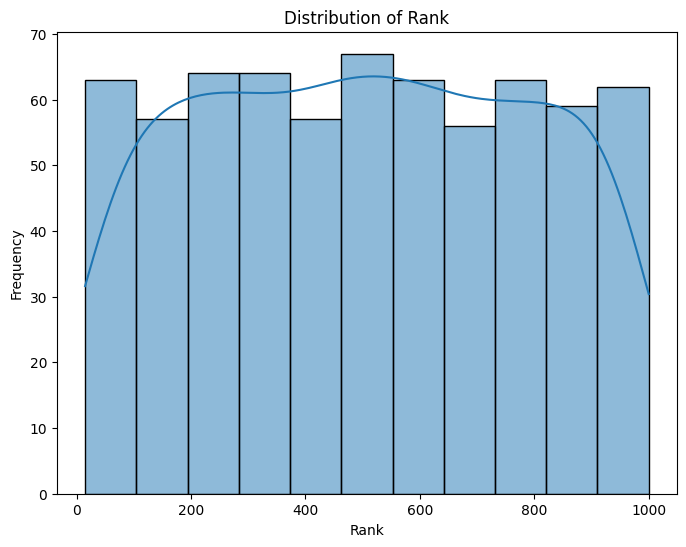

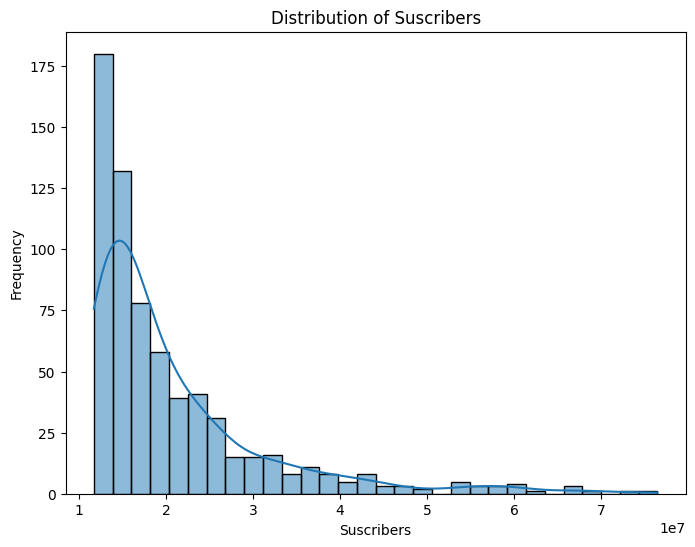

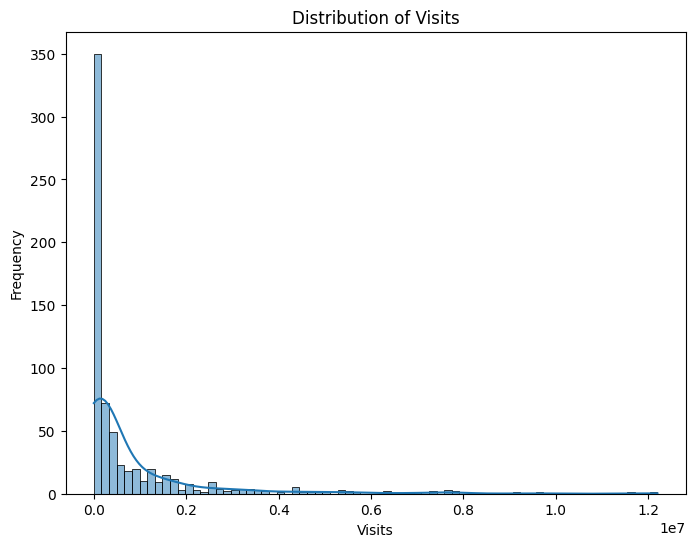

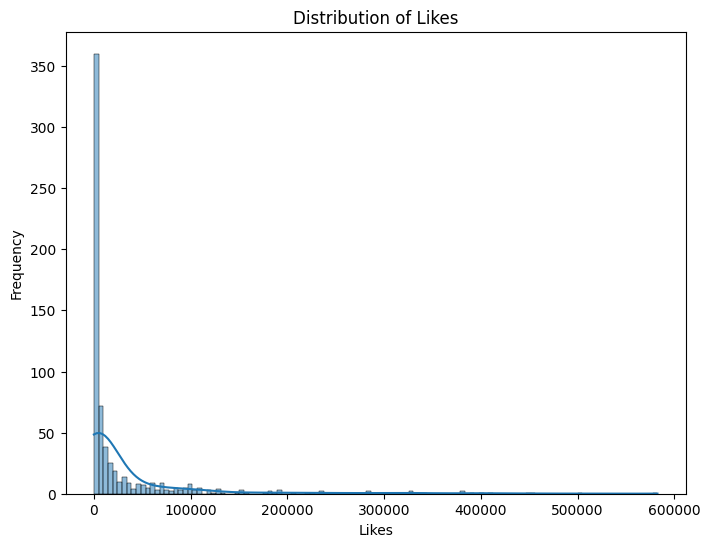

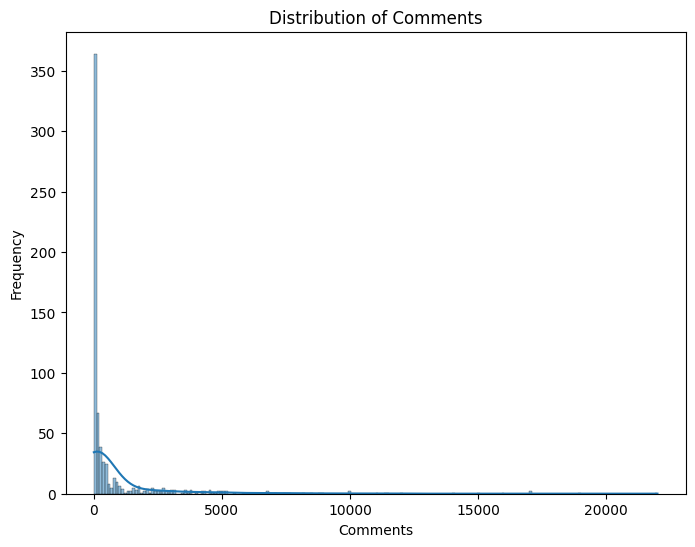

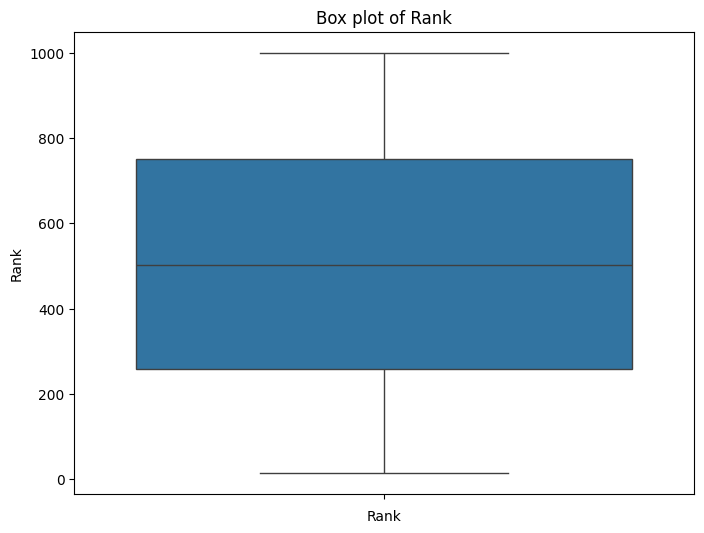

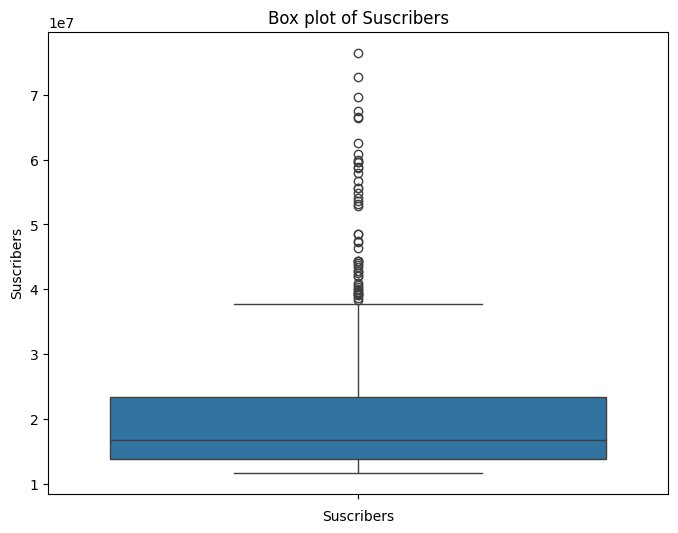

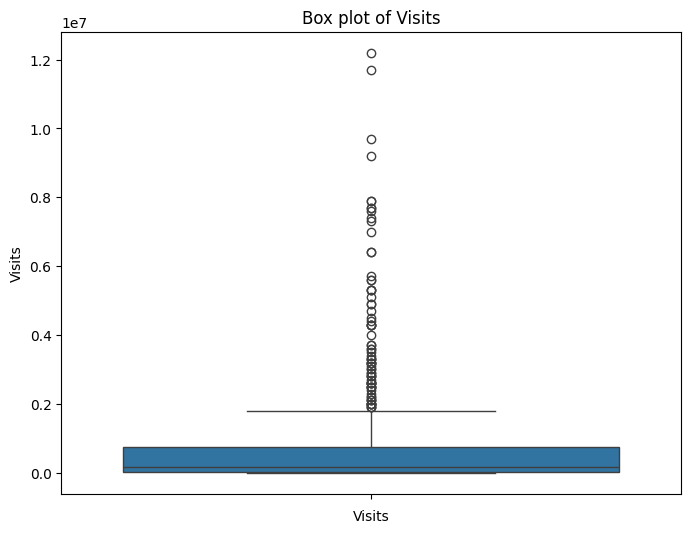

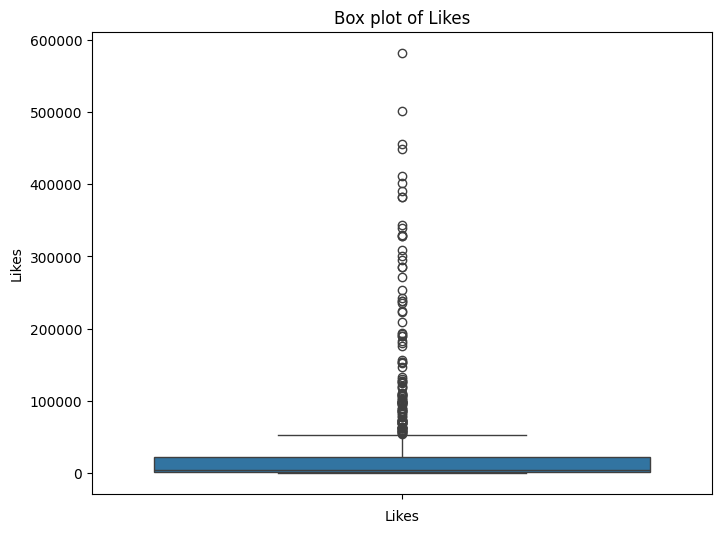

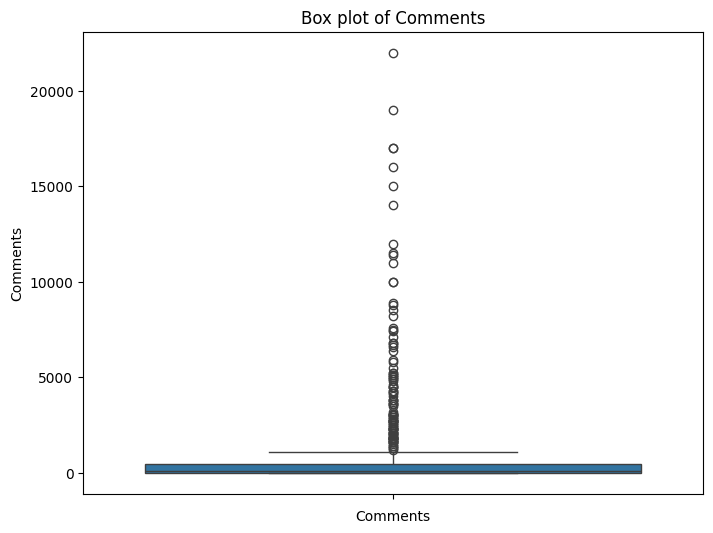

<ipython-input-74-2a1a03f9751b>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


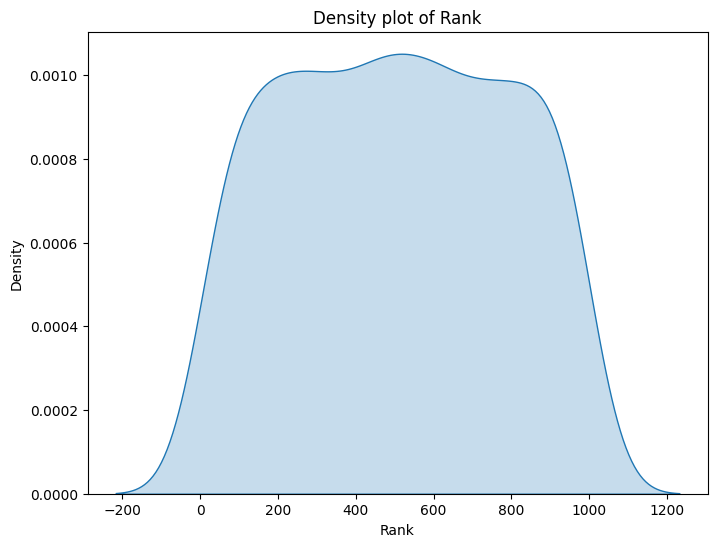

<ipython-input-74-2a1a03f9751b>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


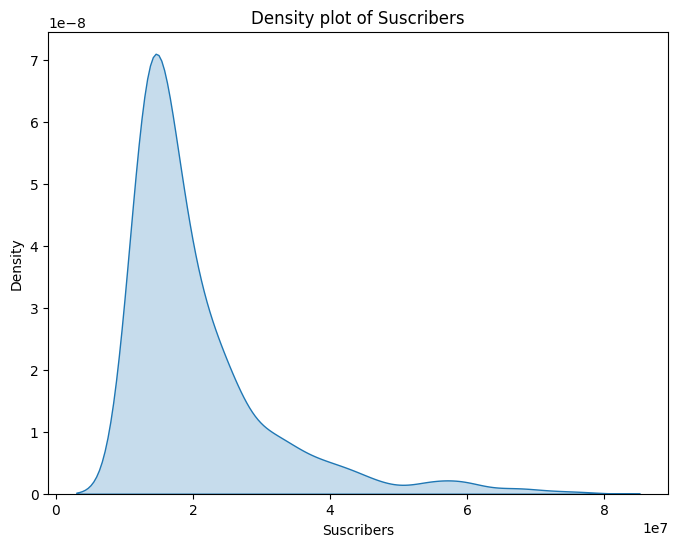

<ipython-input-74-2a1a03f9751b>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


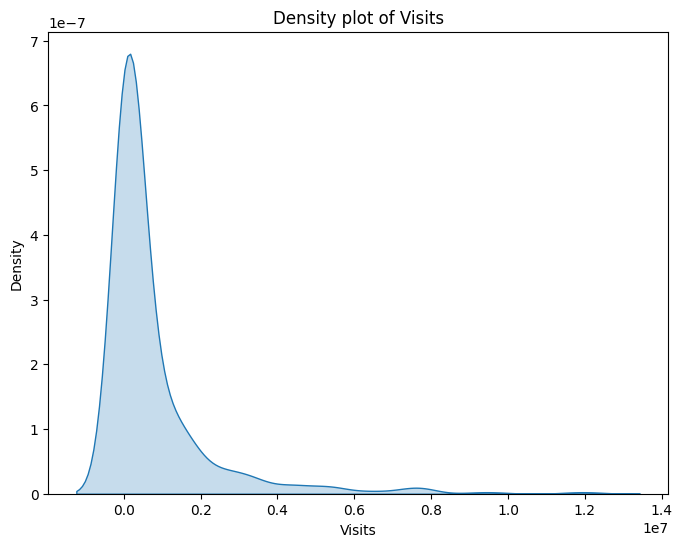

<ipython-input-74-2a1a03f9751b>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


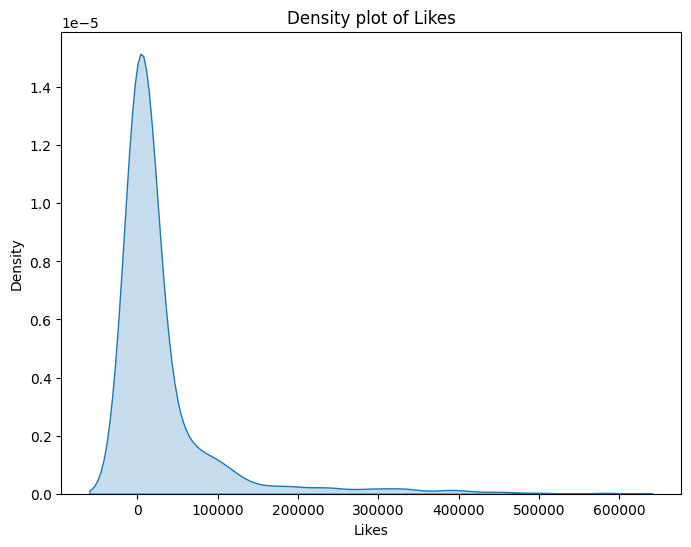

<ipython-input-74-2a1a03f9751b>:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)


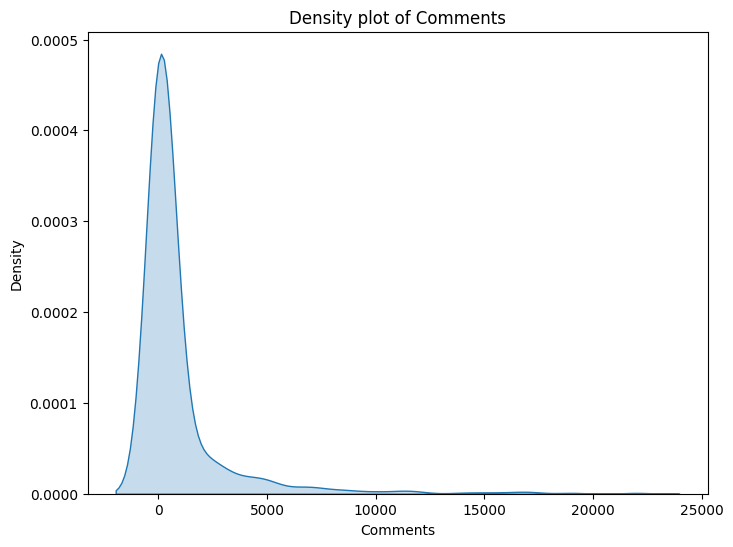

In [74]:
# Visualize data distributions
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

# Box plots
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df[col])
    plt.title(f'Box plot of {col}')
    plt.xlabel(col)
    plt.show()

# Density plots
for col in numeric_cols:
    plt.figure(figsize=(8, 6))
    sns.kdeplot(df[col], shade=True)
    plt.title(f'Density plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.show()

<ipython-input-75-f45c161d8394>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
<ipython-input-75-f45c161d8394>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
<ipython-input-75-f45c161d8394>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
<ipython-input-75-f45c161d8394>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col], shade=True)
<ipython-input-75-f45c161d8394>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`

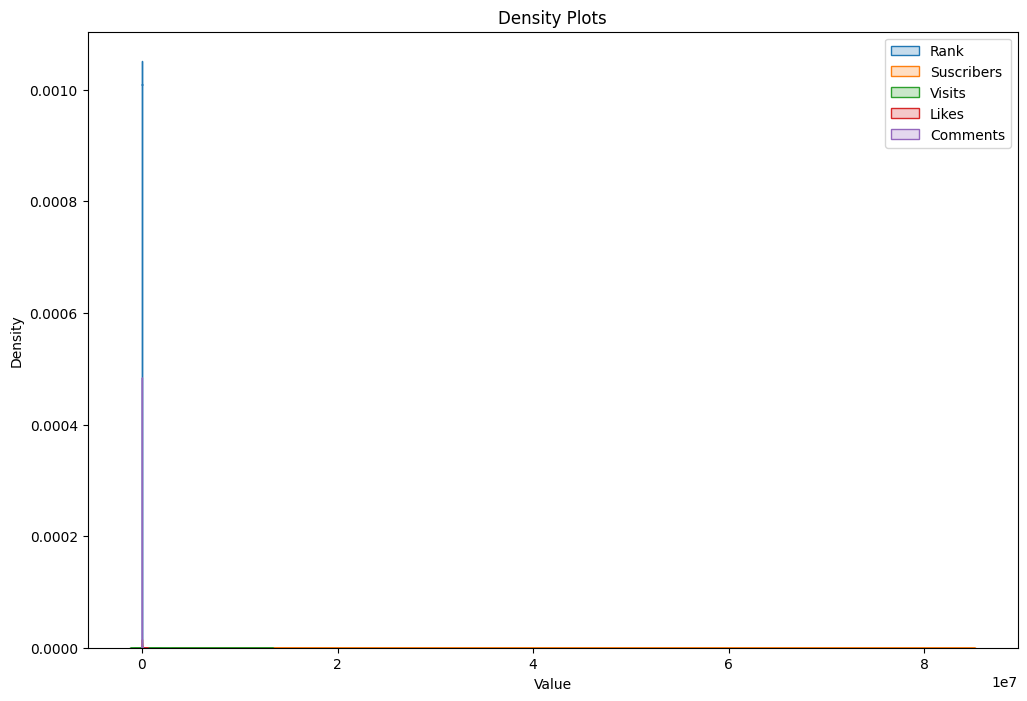

<Figure size 1200x800 with 0 Axes>

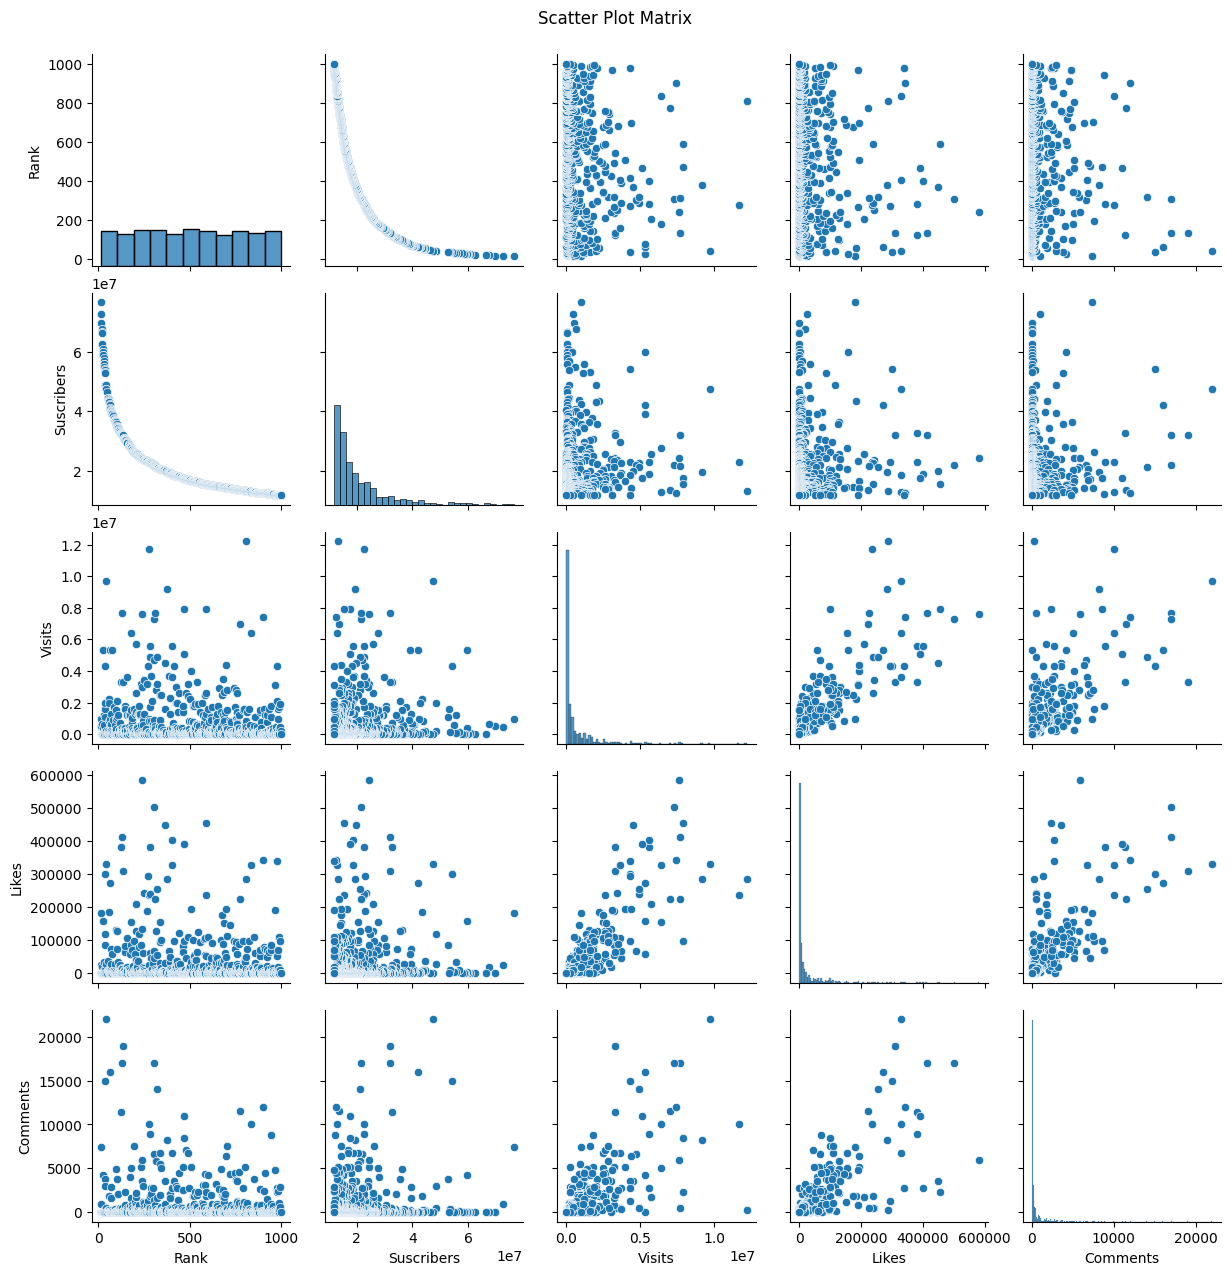

In [75]:
plt.figure(figsize=(12, 8))
for col in numeric_cols:
    sns.kdeplot(df[col], shade=True)
plt.title("Density Plots")
plt.xlabel("Value")
plt.ylabel("Density")
plt.legend(labels=numeric_cols)
plt.show()

# Plot scatter plot matrix
plt.figure(figsize=(12, 8))
sns.pairplot(df[numeric_cols])
plt.suptitle("Scatter Plot Matrix", y=1.02)
plt.show()

In [77]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler



numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# Preprocess the data
X = df[numeric_cols]

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Define the number of clusters (K)
# You can choose the appropriate number of clusters based on your specific criteria
num_clusters = 5

# Apply K-means clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X_scaled)

# Add cluster labels to the DataFrame
df['Cluster'] = kmeans.labels_

# Print the cluster centers
print("Cluster Centers:")
print(scaler.inverse_transform(kmeans.cluster_centers_))

# Print the count of data points in each cluster
print("\nCluster Counts:")
print(df['Cluster'].value_counts())

# Perform analysis on each cluster based on specific criteria
# For example, you can calculate summary statistics for each cluster
cluster_summary_stats = df.groupby('Cluster')[numeric_cols].describe()
print("\nCluster Summary Statistics:")
print(cluster_summary_stats)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster Centers:
[[7.55066225e+02 1.38158940e+07 2.96107947e+05 1.14628510e+04
  2.86480132e+02]
 [5.02016667e+02 1.85166666e+07 2.79554000e+06 1.18298333e+05
  3.52398333e+03]
 [5.72500000e+01 4.75266666e+07 6.41330000e+05 2.16559667e+04
  5.10000000e+02]
 [3.07398268e+02 2.27155844e+07 3.11858009e+05 8.44164502e+03
  2.47714286e+02]
 [3.79863636e+02 2.41681818e+07 6.70454545e+06 3.43113636e+05
  1.05884091e+04]]

Cluster Counts:
Cluster
0    302
3    231
2     60
1     60
4     22
Name: count, dtype: int64

Cluster Summary Statistics:
          Rank                                                                \
         count        mean         std    min     25%    50%     75%     max   
Cluster                                                                        
0        302.0  755.066225  143.645127  508.0  630.25  759.5  878.75  1000.0   
1         60.0  502.016667  235.056610   97.0  309.00  485.0  684.00   991.0   
2         60.0   57.250000   27.486591   15.0   31.75   5

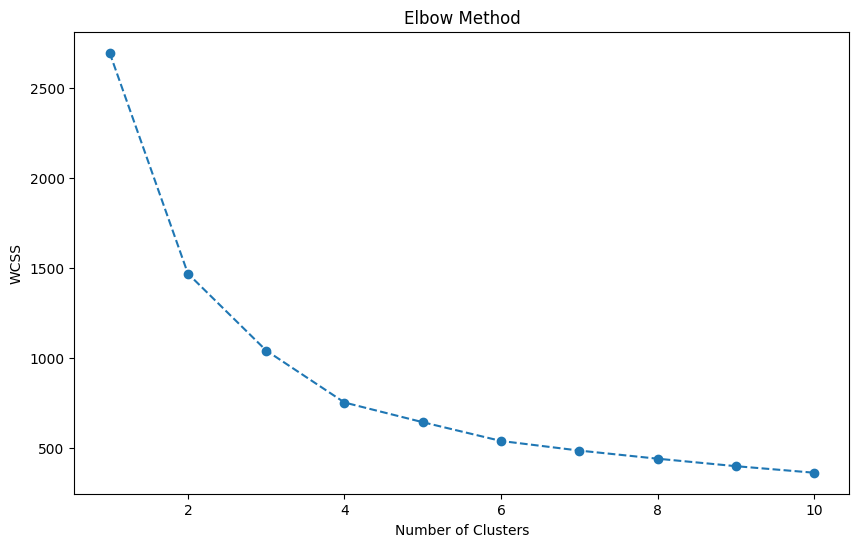

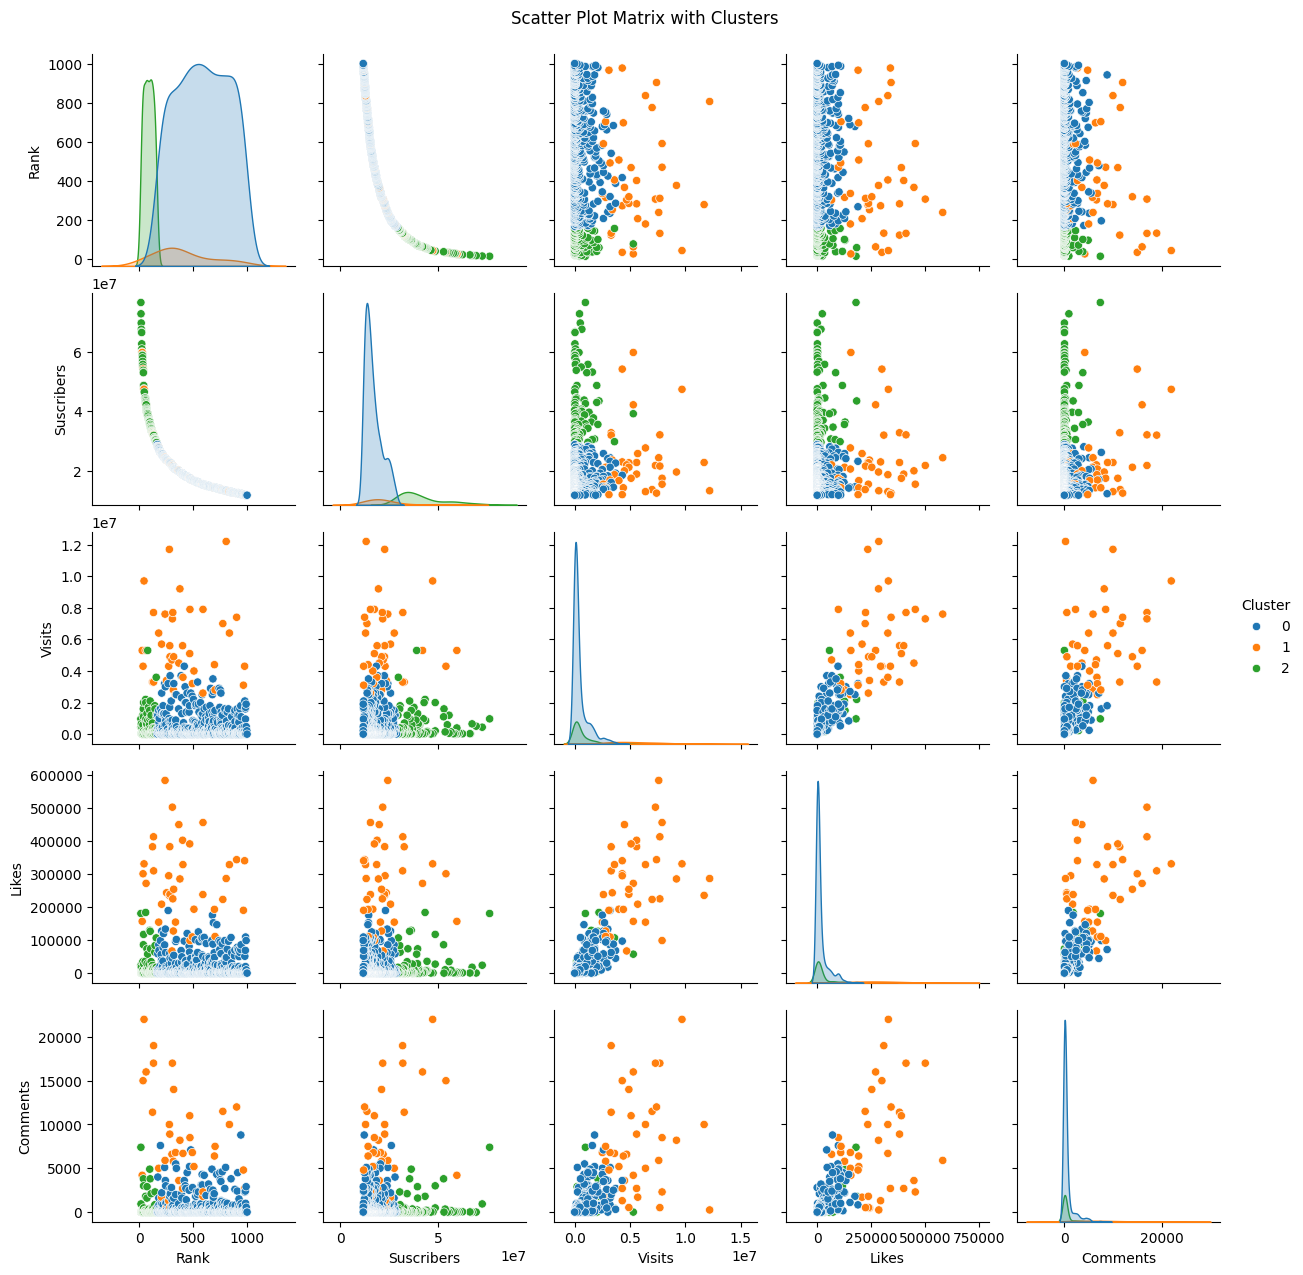

<ipython-input-85-7a16ef96e443>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='tab10')


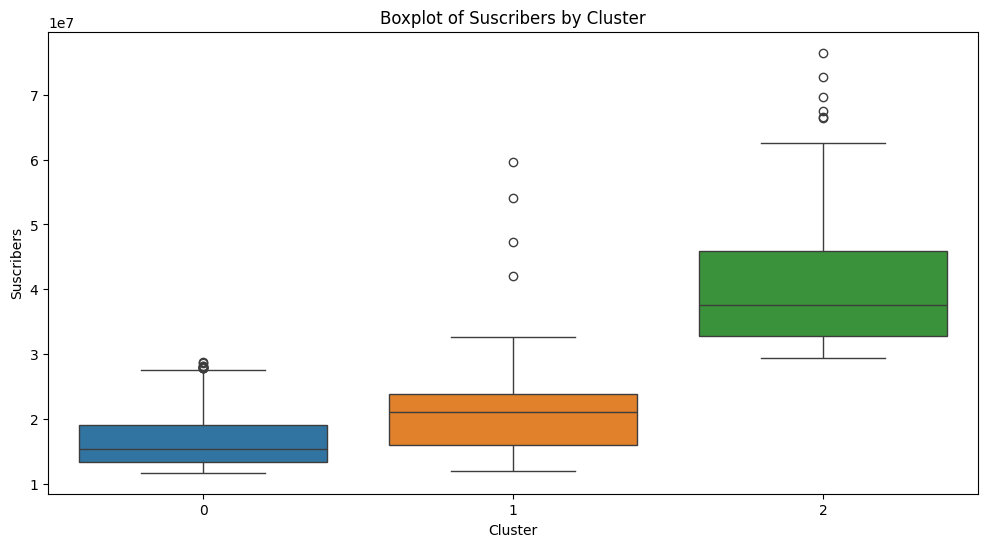

<ipython-input-85-7a16ef96e443>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='tab10')


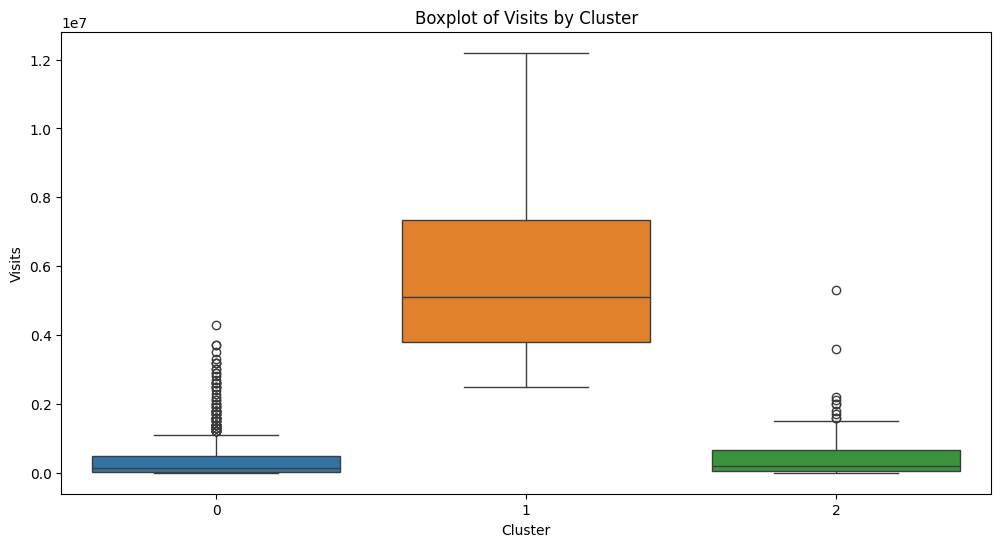

<ipython-input-85-7a16ef96e443>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='tab10')


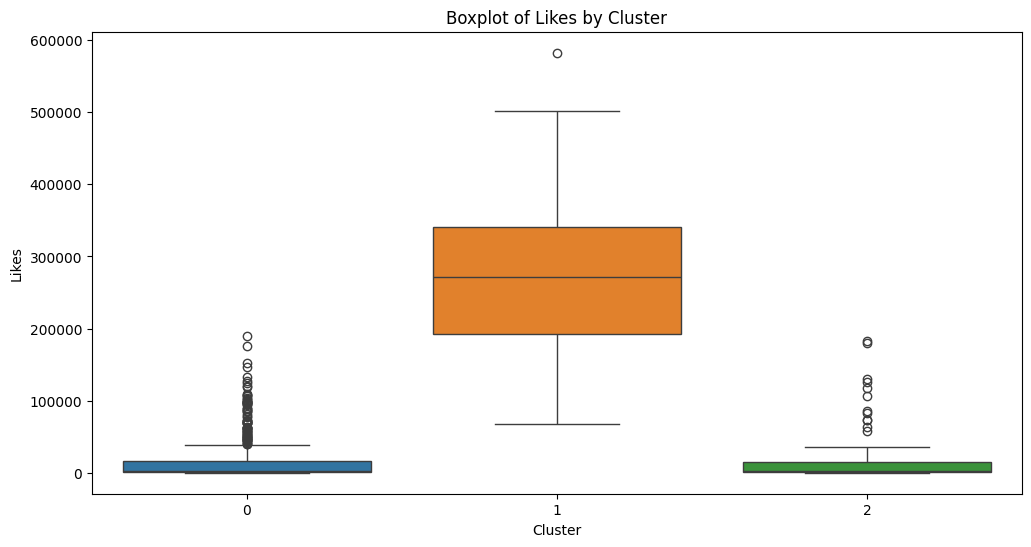

<ipython-input-85-7a16ef96e443>:44: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Cluster', y=feature, data=df, palette='tab10')


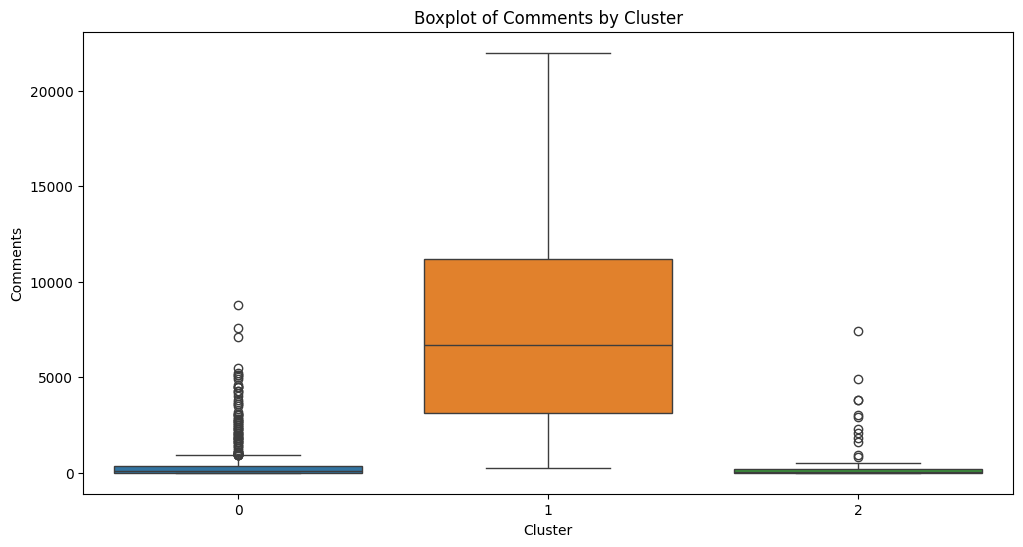


Cluster Profiles:
           Suscribers        Visits          Likes     Comments
Cluster                                                        
0        1.679852e+07  4.531041e+05   16155.730627   508.527675
1        2.306923e+07  5.630769e+06  276661.538462  7719.076923
2        4.159043e+07  5.318468e+05   19269.712766   447.414894


In [85]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the formatted data from CSV
df = pd.read_csv('formatted_youtubers_data.csv')

# Select features for segmentation
features = ['Suscribers', 'Visits', 'Likes', 'Comments']

# Normalize the features
df_normalized = (df[features] - df[features].mean()) / df[features].std()

# Determine the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(df_normalized)
    wcss.append(kmeans.inertia_)

# Plot the elbow method
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

# Choose the optimal number of clusters
n_clusters = 3

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(df_normalized)

# Visualize the clusters using pairplot
sns.pairplot(df, hue='Cluster', palette='tab10', diag_kind='kde')
plt.suptitle('Scatter Plot Matrix with Clusters', y=1.02)
plt.show()

# Visualize the clusters using boxplots
for feature in features:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x='Cluster', y=feature, data=df, palette='tab10')
    plt.title(f'Boxplot of {feature} by Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.show()

# Create cluster profiles
cluster_profiles = df.groupby('Cluster')[features].mean()

# Display cluster profiles
print("\nCluster Profiles:")
print(cluster_profiles)





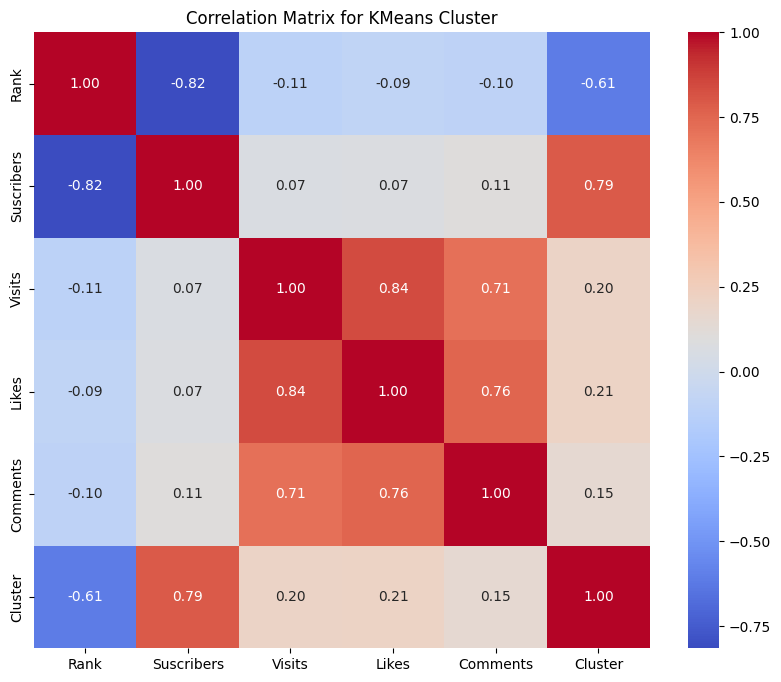

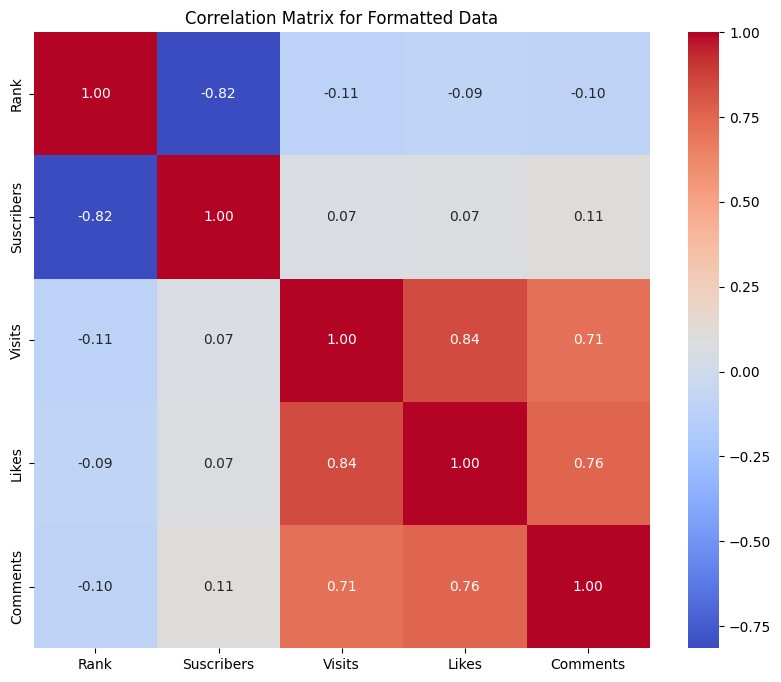

In [90]:
# Define df_numeric containing only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Create a correlation matrix for the KMeans cluster
correlation_matrix_cluster = df_numeric.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_cluster, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix for KMeans Cluster')
plt.show()

# Load the formatted data from CSV
df = pd.read_csv('formatted_youtubers_data.csv')

# Define df_numeric containing only numeric columns
df_numeric = df.select_dtypes(include=[float, int])

# Create a correlation matrix for the formatted data
correlation_matrix = df_numeric.corr()

# Plot the correlation matrix heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Matrix for Formatted Data')
plt.show()

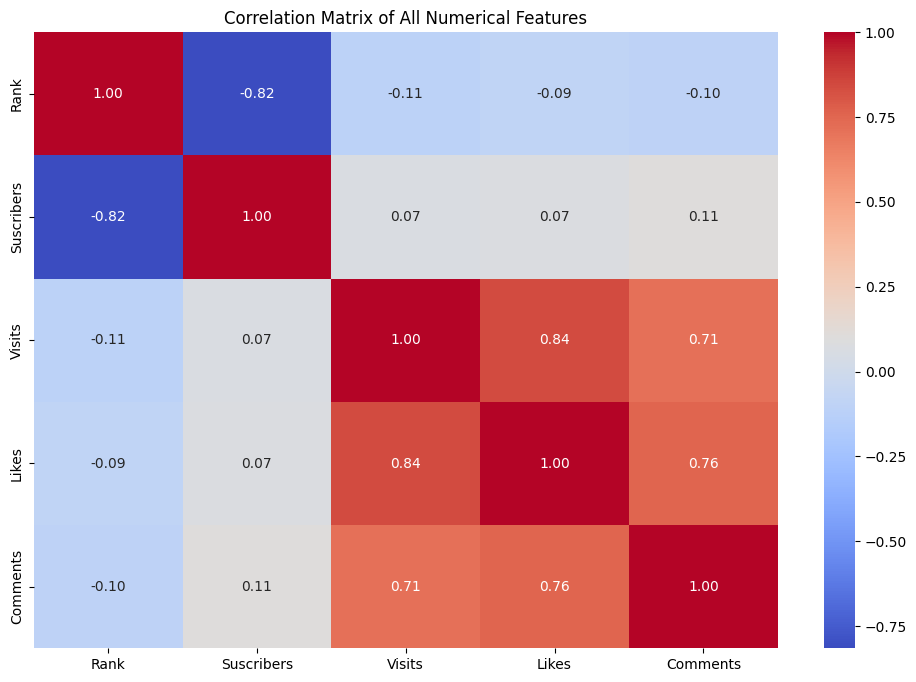

In [91]:
# Select only numeric columns for correlation calculation
numeric_cols = df_cleaned.select_dtypes(include=['number'])

# Calculate the correlation matrix
corr_matrix = numeric_cols.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix of All Numerical Features')
plt.show()

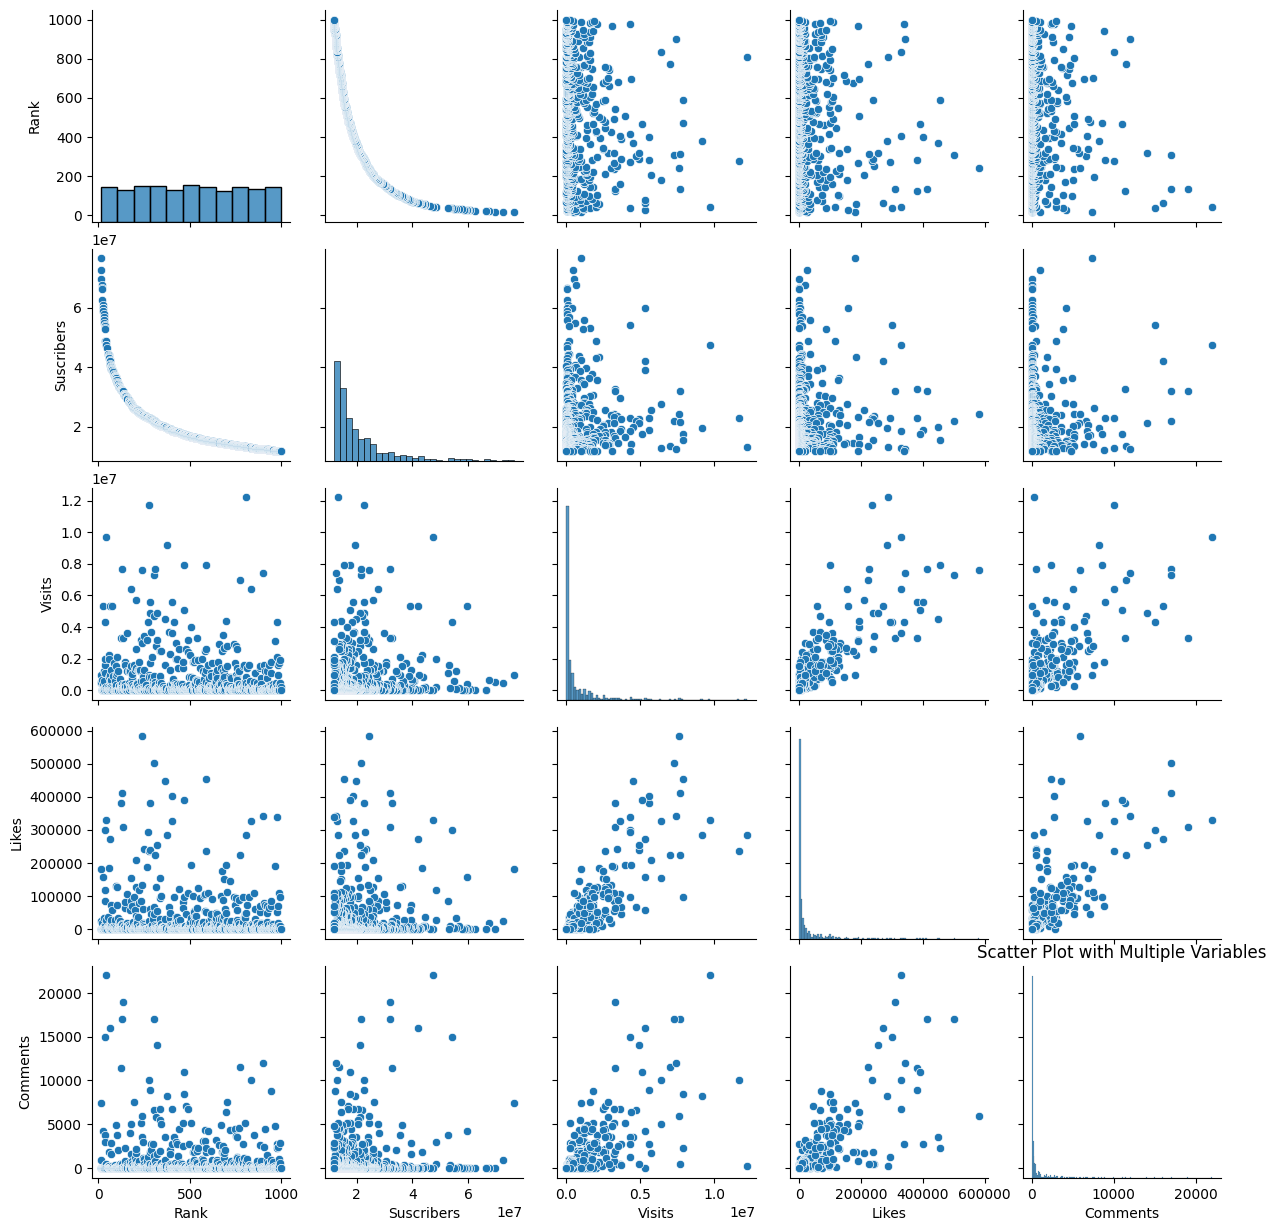

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Load the formatted data from CSV
df = pd.read_csv('formatted_youtubers_data.csv')

# Define the variables for the scatter plot
variables = ['Rank', 'Suscribers', 'Visits', 'Likes', 'Comments']

# Create the scatter plot
sns.pairplot(df[variables])
plt.title('Scatter Plot with Multiple Variables')
plt.show()


In [93]:
# Grouping by 'Country' and calculating mean for 'Suscribers', 'Visits', 'Likes', and 'Comments'
grouped_by_country = df.groupby('Country').agg({'Suscribers': 'mean', 'Visits': 'mean', 'Likes': 'mean', 'Comments': 'mean'}).reset_index()

# Grouping by 'Categories' and calculating sum for 'Suscribers', 'Visits', 'Likes', and 'Comments'
grouped_by_categories = df.groupby('Categories').agg({'Suscribers': 'sum', 'Visits': 'sum', 'Likes': 'sum', 'Comments': 'sum'}).reset_index()

# Grouping by 'Country' and 'Categories' and calculating median for 'Suscribers', 'Visits', 'Likes', and 'Comments'
grouped_by_country_categories = df.groupby(['Country', 'Categories']).agg({'Suscribers': 'median', 'Visits': 'median', 'Likes': 'median', 'Comments': 'median'}).reset_index()

# Displaying the grouped data
print("Grouped by Country:")
print(grouped_by_country.head())

print("\nGrouped by Categories:")
print(grouped_by_categories.head())

print("\nGrouped by Country and Categories:")
print(grouped_by_country_categories.head())


Grouped by Country:
          Country   Suscribers        Visits          Likes     Comments
0  Arabia saudita  17300000.00  1.158167e+06   34000.000000  1640.333333
1         Argelia  12200000.00  3.335000e+05   16000.000000   791.000000
2       Argentina  18619999.80  2.394280e+06  127880.000000  1132.800000
3      Bangladesh  18400000.00  3.356667e+04     349.333333    21.333333
4          Brasil  19135999.96  3.576300e+05   19828.460000   526.020000

Grouped by Categories:
                    Categories  Suscribers    Visits    Likes  Comments
0                   Animaciã³n   388100000  14007800   471096      8726
1            Animaciã³n, humor   531400000  48823400  2235745     61514
2  Animaciã³n, humor, juguetes    13900000      8000       37         0
3         Animaciã³n, juguetes   637000000   7238000    42439        15
4      Animaciã³n, videojuegos   631600000  37302000  2410997     76245

Grouped by Country and Categories:
          Country               Categories  Suscri

In [94]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Assuming df_cleaned is your formatted DataFrame

# Selecting features and target
X = df_cleaned[['Suscribers', 'Visits', 'Likes', 'Comments']]  # example features
y = df_cleaned['Suscribers']  # target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)



Mean Squared Error: 5.1399214103016507e-17
R^2 Score: 1.0


In [97]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# Define a threshold for high likes
threshold = df_cleaned['Likes'].quantile(0.75)  # Let's say high likes are above the 75th percentile
df_cleaned['high_likes'] = (df_cleaned['Likes'] > threshold).astype(int)

# Selecting features and the new binary target
X = df_cleaned[['Rank', 'Suscribers', 'Visits', 'Comments']]  # example features
y = df_cleaned['high_likes']  # binary target

# Splitting the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the classifier
classifier = DecisionTreeClassifier(max_depth=5, random_state=42)
classifier.fit(X_train, y_train)

# Making predictions
y_pred = classifier.predict(X_test)

# Evaluating the classifier
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", cm)
print("Classification Report:\n", report)



Accuracy: 0.9629629629629629
Confusion Matrix:
 [[106   1]
 [  4  24]]
Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       107
           1       0.96      0.86      0.91        28

    accuracy                           0.96       135
   macro avg       0.96      0.92      0.94       135
weighted avg       0.96      0.96      0.96       135

